In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import xgboost as xgb

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
#import graphviz
#from xgboost import early_stopping

In [3]:
df = pd.read_csv('data_set.csv')

In [4]:
df.head()

,Unnamed: 0,id,id_number,age,gender,education,status,start years,year_experience,crops,...,rain_6,rain_7,rain_8,rain_9,rain_10,rain_11,rain_12,credit_score,credit_utilization,credit_inquiry
0,1,8.100000e+12,3006,56,Female,Primary School,Married,31,25,palm oil,...,69.3,128.9,69.9,82.7,65.6,120.4,129.4,NaN,NaN,NaN
1,2,8.100000e+12,2675,64,Male,Primary School,Never Married,26,38,palm oil,...,58.4,173.7,55.6,121.1,154.7,73.6,193.9,NaN,NaN,NaN
2,3,8.100000e+12,11650,51,Male,Primary School,Married,25,26,palm oil,...,185.8,118.8,199.0,150.1,117.2,86.2,77.4,NaN,NaN,NaN
3,4,8.100000e+12,12072,40,Male,Primary School,Never Married,29,11,palm oil,...,70.2,119.8,91.2,79.3,192.3,190.0,88.9,NaN,NaN,NaN
4,5,8.100000e+12,3361,41,Male,Primary School,Married,25,16,palm oil,...,177.5,124.1,192.8,159.8,186.6,157.2,68.1,NaN,NaN,NaN


### Dropping columns

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'id_number', 'age', 'gender', 'education', 'status',
       'start years', 'year_experience', 'crops', 'size_rai',
       ' yield (kg/rai) ', ' yield (ton) ', ' mkt_price (THB/ton) ',
       'soil_quality', 'annual_income', ' cost (THB/ton) ', 'annual_expense',
       'profit_loss', 'existing_loan', ' Saving/year ', 'loan_status',
       'issue_date', 'addr_subdist', 'addr_district', 'addr_province',
       'zip_code', 'temp_1', 'temp_2', 'temp_3', 'temp_4', 'temp_5', 'temp_6',
       'temp_7', 'temp_8', 'temp_9', 'temp_10', 'temp_11', 'temp_12', 'rain_1',
       'rain_2', 'rain_3', 'rain_4', 'rain_5', 'rain_6', 'rain_7', 'rain_8',
       'rain_9', 'rain_10', 'rain_11', 'rain_12', 'credit_score',
       'credit_utilization', 'credit_inquiry'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0', 'id', 'id_number', ' yield (ton) ', ' mkt_price (THB/ton) ', ' cost (THB/ton) ', 'profit_loss', 'issue_date', 'addr_subdist', 'addr_district', 'addr_province', 'credit_score', 'credit_utilization', 'credit_inquiry'], axis = 1, inplace = True)

In [7]:
df.head()

,age,gender,education,status,start years,year_experience,crops,size_rai,yield (kg/rai),soil_quality,...,rain_3,rain_4,rain_5,rain_6,rain_7,rain_8,rain_9,rain_10,rain_11,rain_12
0,56,Female,Primary School,Married,31,25,palm oil,54.0,"3,479.84",S1,...,118.8,74.9,181.6,69.3,128.9,69.9,82.7,65.6,120.4,129.4
1,64,Male,Primary School,Never Married,26,38,palm oil,41.0,"3,279.08",N,...,172.6,132.9,143.6,58.4,173.7,55.6,121.1,154.7,73.6,193.9
2,51,Male,Primary School,Married,25,26,palm oil,51.0,"3,412.92",S2,...,165.4,112.1,52.6,185.8,118.8,199.0,150.1,117.2,86.2,77.4
3,40,Male,Primary School,Never Married,29,11,palm oil,52.0,"3,212.16",N,...,151.7,72.7,106.7,70.2,119.8,91.2,79.3,192.3,190.0,88.9
4,41,Male,Primary School,Married,25,16,palm oil,30.0,"3,546.76",S1,...,98.0,74.3,196.8,177.5,124.1,192.8,159.8,186.6,157.2,68.1


### Fill blank space with '_'

In [8]:
df.columns = df.columns.str.replace(' ', '_')

In [9]:
df.head()

,age,gender,education,status,start_years,year_experience,crops,size_rai,_yield_(kg/rai)_,soil_quality,...,rain_3,rain_4,rain_5,rain_6,rain_7,rain_8,rain_9,rain_10,rain_11,rain_12
0,56,Female,Primary School,Married,31,25,palm oil,54.0,"3,479.84",S1,...,118.8,74.9,181.6,69.3,128.9,69.9,82.7,65.6,120.4,129.4
1,64,Male,Primary School,Never Married,26,38,palm oil,41.0,"3,279.08",N,...,172.6,132.9,143.6,58.4,173.7,55.6,121.1,154.7,73.6,193.9
2,51,Male,Primary School,Married,25,26,palm oil,51.0,"3,412.92",S2,...,165.4,112.1,52.6,185.8,118.8,199.0,150.1,117.2,86.2,77.4
3,40,Male,Primary School,Never Married,29,11,palm oil,52.0,"3,212.16",N,...,151.7,72.7,106.7,70.2,119.8,91.2,79.3,192.3,190.0,88.9
4,41,Male,Primary School,Married,25,16,palm oil,30.0,"3,546.76",S1,...,98.0,74.3,196.8,177.5,124.1,192.8,159.8,186.6,157.2,68.1


## Changing to Float values

In [10]:
df.dtypes

age                   int64
gender               object
education            object
status               object
start_years           int64
year_experience       int64
crops                object
size_rai            float64
_yield_(kg/rai)_     object
soil_quality         object
annual_income        object
annual_expense       object
existing_loan        object
_Saving/year_        object
loan_status          object
zip_code              int64
temp_1              float64
temp_2              float64
temp_3              float64
temp_4              float64
temp_5              float64
temp_6              float64
temp_7              float64
temp_8              float64
temp_9              float64
temp_10             float64
temp_11             float64
temp_12             float64
rain_1              float64
rain_2              float64
rain_3              float64
rain_4              float64
rain_5              float64
rain_6              float64
rain_7              float64
rain_8              

#### _yield_(kg/rai)_

In [11]:
df['_yield_(kg/rai)_'] = df['_yield_(kg/rai)_'].str.replace(',', '')

In [12]:
df['_yield_(kg/rai)_'] = pd.to_numeric(df['_yield_(kg/rai)_'])

#### annual_income

In [13]:
df['annual_income'] = df['annual_income'].str.replace(',', '')

In [14]:
df['annual_income'] = pd.to_numeric(df['annual_income'])

#### annual_expense

In [15]:
df['annual_expense'] = df['annual_expense'].str.replace(',', '')

In [16]:
df['annual_expense'] = pd.to_numeric(df['annual_expense'])

#### existing_loan

In [17]:
df['existing_loan'] = df['existing_loan'].str.replace(',', '')

In [18]:
df['existing_loan'] = pd.to_numeric(df['existing_loan'])

#### _Saving/year_

In [19]:
df['_Saving/year_'] = df['_Saving/year_'].str.replace(',', '')

In [20]:
df['_Saving/year_'] = pd.to_numeric(df['_Saving/year_'])

In [21]:
df.dtypes

age                   int64
gender               object
education            object
status               object
start_years           int64
year_experience       int64
crops                object
size_rai            float64
_yield_(kg/rai)_    float64
soil_quality         object
annual_income       float64
annual_expense      float64
existing_loan       float64
_Saving/year_       float64
loan_status          object
zip_code              int64
temp_1              float64
temp_2              float64
temp_3              float64
temp_4              float64
temp_5              float64
temp_6              float64
temp_7              float64
temp_8              float64
temp_9              float64
temp_10             float64
temp_11             float64
temp_12             float64
rain_1              float64
rain_2              float64
rain_3              float64
rain_4              float64
rain_5              float64
rain_6              float64
rain_7              float64
rain_8              

## Fill all blank space ' ' with '_' 

In [22]:
df.replace(' ', '_', regex = True, inplace = True)
df.head()

,age,gender,education,status,start_years,year_experience,crops,size_rai,_yield_(kg/rai)_,soil_quality,...,rain_3,rain_4,rain_5,rain_6,rain_7,rain_8,rain_9,rain_10,rain_11,rain_12
0,56,Female,Primary_School,Married,31,25,palm_oil,54.0,3479.84,S1,...,118.8,74.9,181.6,69.3,128.9,69.9,82.7,65.6,120.4,129.4
1,64,Male,Primary_School,Never_Married,26,38,palm_oil,41.0,3279.08,N,...,172.6,132.9,143.6,58.4,173.7,55.6,121.1,154.7,73.6,193.9
2,51,Male,Primary_School,Married,25,26,palm_oil,51.0,3412.92,S2,...,165.4,112.1,52.6,185.8,118.8,199.0,150.1,117.2,86.2,77.4
3,40,Male,Primary_School,Never_Married,29,11,palm_oil,52.0,3212.16,N,...,151.7,72.7,106.7,70.2,119.8,91.2,79.3,192.3,190.0,88.9
4,41,Male,Primary_School,Married,25,16,palm_oil,30.0,3546.76,S1,...,98.0,74.3,196.8,177.5,124.1,192.8,159.8,186.6,157.2,68.1


In [23]:
df.dtypes

age                   int64
gender               object
education            object
status               object
start_years           int64
year_experience       int64
crops                object
size_rai            float64
_yield_(kg/rai)_    float64
soil_quality         object
annual_income       float64
annual_expense      float64
existing_loan       float64
_Saving/year_       float64
loan_status          object
zip_code              int64
temp_1              float64
temp_2              float64
temp_3              float64
temp_4              float64
temp_5              float64
temp_6              float64
temp_7              float64
temp_8              float64
temp_9              float64
temp_10             float64
temp_11             float64
temp_12             float64
rain_1              float64
rain_2              float64
rain_3              float64
rain_4              float64
rain_5              float64
rain_6              float64
rain_7              float64
rain_8              

# Splitting data into X and y

In [24]:
X = df.drop('loan_status', axis = 1).copy()
X.head()

,age,gender,education,status,start_years,year_experience,crops,size_rai,_yield_(kg/rai)_,soil_quality,...,rain_3,rain_4,rain_5,rain_6,rain_7,rain_8,rain_9,rain_10,rain_11,rain_12
0,56,Female,Primary_School,Married,31,25,palm_oil,54.0,3479.84,S1,...,118.8,74.9,181.6,69.3,128.9,69.9,82.7,65.6,120.4,129.4
1,64,Male,Primary_School,Never_Married,26,38,palm_oil,41.0,3279.08,N,...,172.6,132.9,143.6,58.4,173.7,55.6,121.1,154.7,73.6,193.9
2,51,Male,Primary_School,Married,25,26,palm_oil,51.0,3412.92,S2,...,165.4,112.1,52.6,185.8,118.8,199.0,150.1,117.2,86.2,77.4
3,40,Male,Primary_School,Never_Married,29,11,palm_oil,52.0,3212.16,N,...,151.7,72.7,106.7,70.2,119.8,91.2,79.3,192.3,190.0,88.9
4,41,Male,Primary_School,Married,25,16,palm_oil,30.0,3546.76,S1,...,98.0,74.3,196.8,177.5,124.1,192.8,159.8,186.6,157.2,68.1


In [25]:
y = df['loan_status'].copy()
y.head()

0    Fully_Paid
1    Fully_Paid
2    Fully_Paid
3    Fully_Paid
4       Current
Name: loan_status, dtype: object

In [26]:
y.unique()

array(['Fully_Paid', 'Current', 'Charged_Off', 'Late_(31-120_days)',
       'In_Grace_Period'], dtype=object)

# Format Data (One-Hot Encoding)

## Convert all object to only int, float, and boolean

#### Gender (from object to boolean) 1 for 'Male' and 0 for 'Female'

In [27]:
X['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [28]:
X['gender'] = X['gender'].map({'Male': 1, 'Female': 0})

### Education (from object to dummies)

In [29]:
X.dtypes

age                   int64
gender                int64
education            object
status               object
start_years           int64
year_experience       int64
crops                object
size_rai            float64
_yield_(kg/rai)_    float64
soil_quality         object
annual_income       float64
annual_expense      float64
existing_loan       float64
_Saving/year_       float64
zip_code              int64
temp_1              float64
temp_2              float64
temp_3              float64
temp_4              float64
temp_5              float64
temp_6              float64
temp_7              float64
temp_8              float64
temp_9              float64
temp_10             float64
temp_11             float64
temp_12             float64
rain_1              float64
rain_2              float64
rain_3              float64
rain_4              float64
rain_5              float64
rain_6              float64
rain_7              float64
rain_8              float64
rain_9              

In [30]:
X_Encoded = pd.get_dummies(X, columns=['education',
                              'status',
                              'crops'], dtype = float)

In [31]:
X_Encoded['soil_quality'].unique()

array(['S1', 'N', 'S2', 'S3'], dtype=object)

In [32]:
X_Encoded['soil_quality'] = X['soil_quality'].map({'N': 0, 'S3': 1, 'S2': 2, 'S1': 3})

In [33]:
X_Encoded.head()

,age,gender,start_years,year_experience,size_rai,_yield_(kg/rai)_,soil_quality,annual_income,annual_expense,existing_loan,...,status_Married,status_Never_Married,status_Separated,crops_cassava,crops_coffee,crops_corn,crops_palm_oil,crops_pineaple,crops_rice,crops_sugar_cane
0,56,0,31,25,54.0,3479.84,3,1308196.42,584216.42,586964.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,64,1,26,38,41.0,3279.08,0,952812.20,416098.86,589881.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,51,1,25,26,51.0,3412.92,2,1258535.81,543934.13,641400.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40,1,29,11,52.0,3212.16,0,992267.86,529158.39,616795.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,41,1,25,16,30.0,3546.76,3,538795.05,338573.71,586267.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
X_Encoded.dtypes

age                             int64
gender                          int64
start_years                     int64
year_experience                 int64
size_rai                      float64
_yield_(kg/rai)_              float64
soil_quality                    int64
annual_income                 float64
annual_expense                float64
existing_loan                 float64
_Saving/year_                 float64
zip_code                        int64
temp_1                        float64
temp_2                        float64
temp_3                        float64
temp_4                        float64
temp_5                        float64
temp_6                        float64
temp_7                        float64
temp_8                        float64
temp_9                        float64
temp_10                       float64
temp_11                       float64
temp_12                       float64
rain_1                        float64
rain_2                        float64
rain_3      

In [35]:
y.unique()

array(['Fully_Paid', 'Current', 'Charged_Off', 'Late_(31-120_days)',
       'In_Grace_Period'], dtype=object)

In [36]:
y_cleaned = y.map({
    'Fully_Paid': 1,
    'Current': 1,
    'Charged_Off': 0,
    'In_Grace_Period': 0,
    'Late_(31-120_days)': 0
})

In [37]:
y_cleaned.unique()

array([1, 0], dtype=int64)

## Check for Correlation

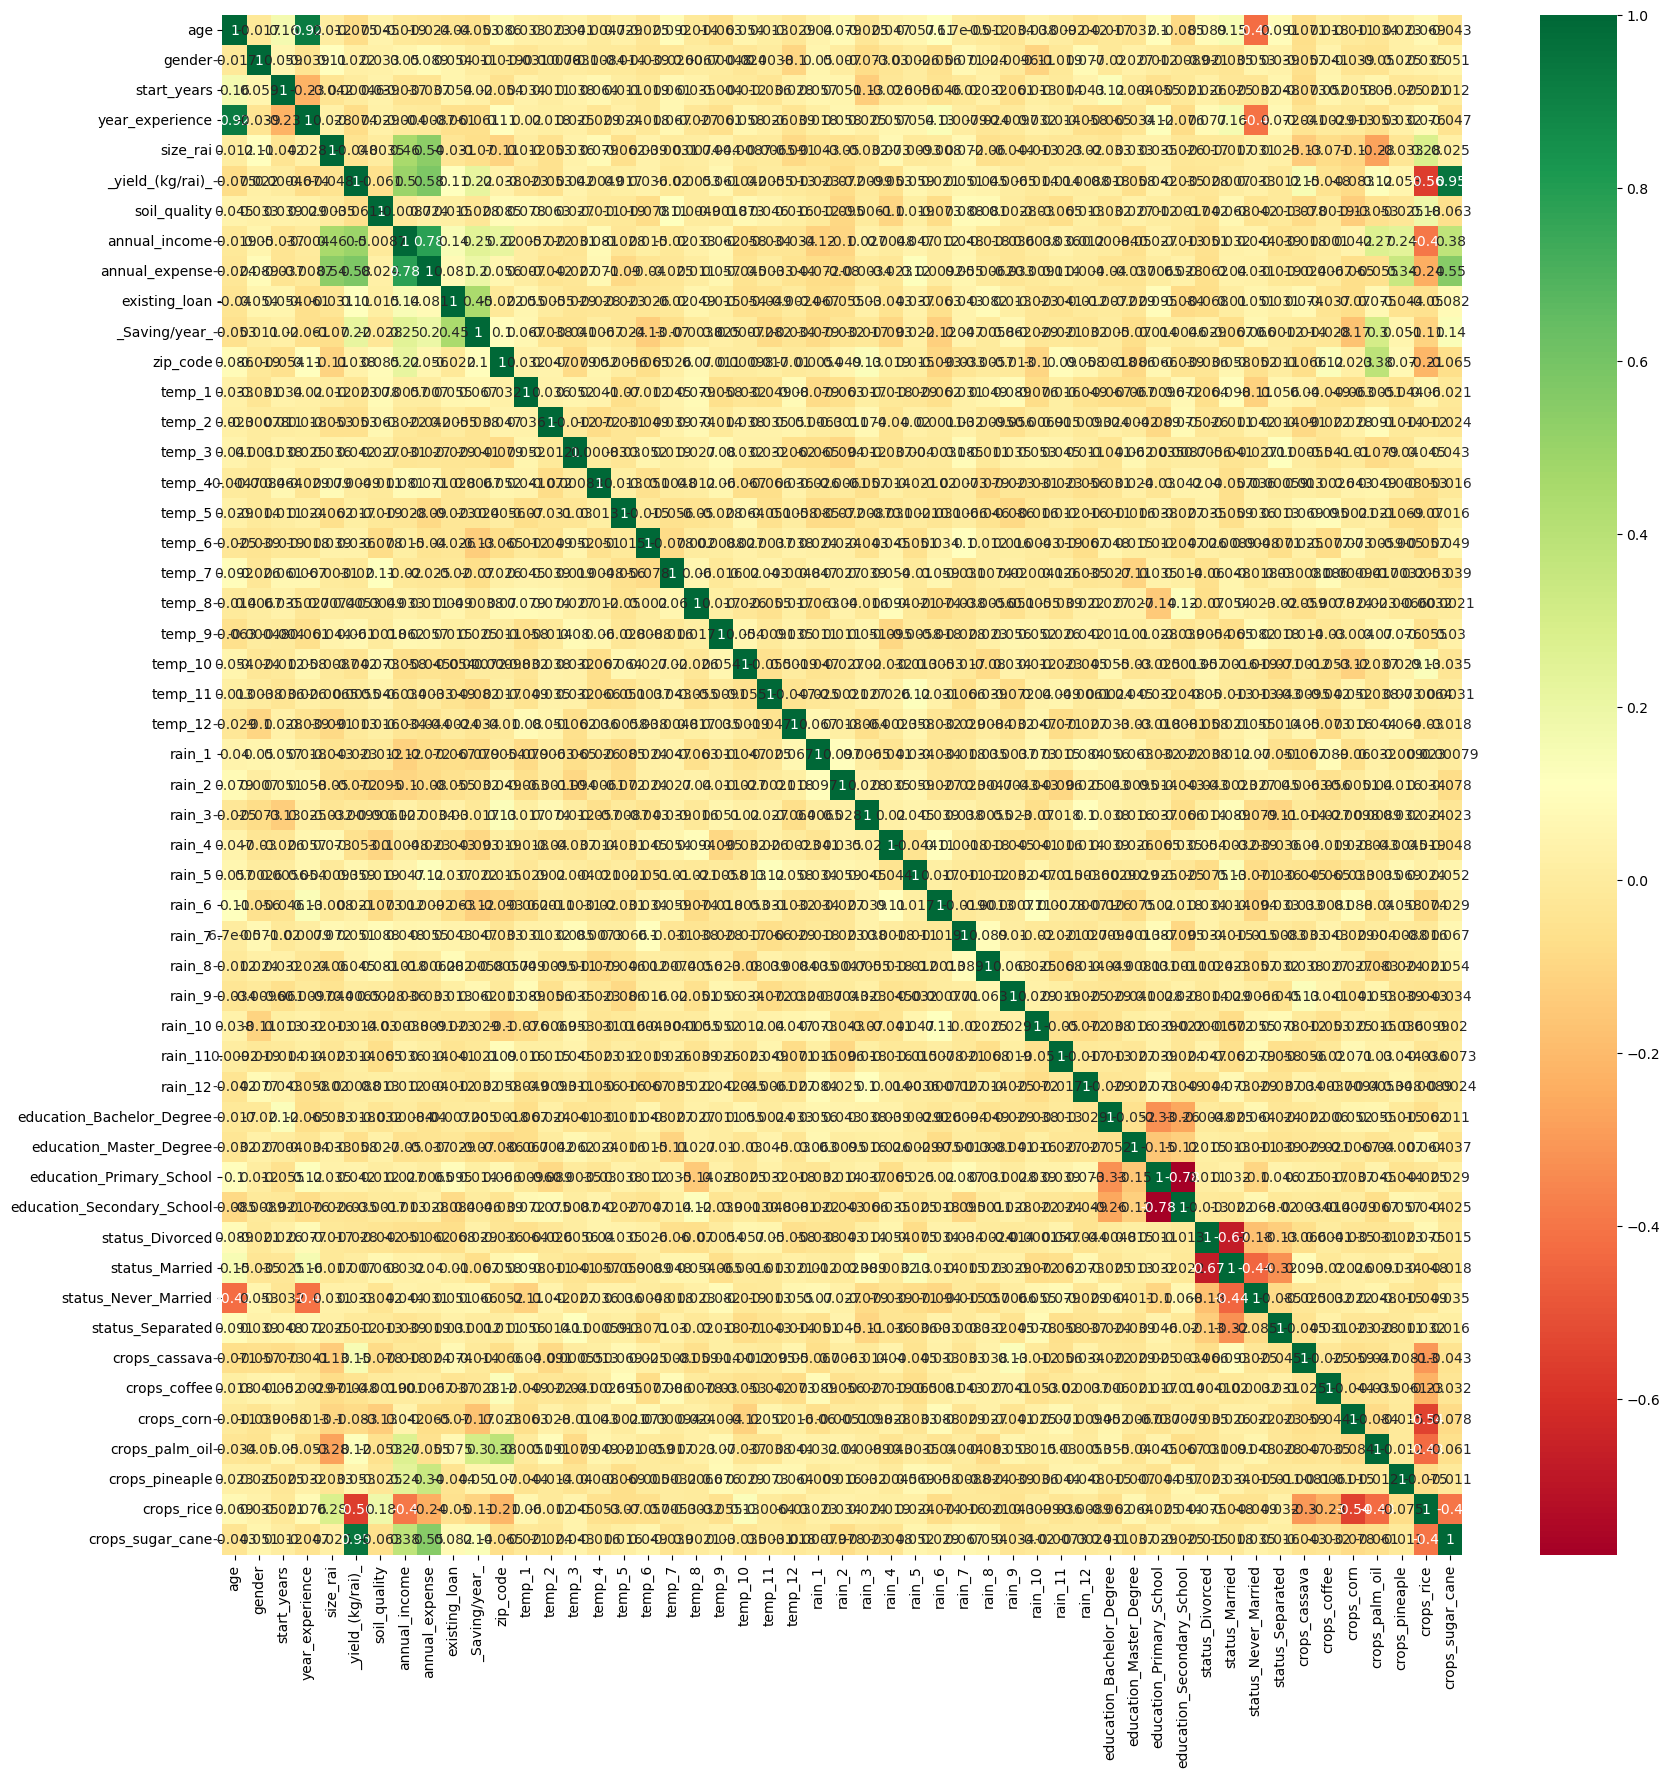

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = X_Encoded.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
g = sns.heatmap(X_Encoded[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Preliminary XGBoost Model

In [39]:
# Prob of Not Default
sum(y_cleaned)/len(y_cleaned)

0.764

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_Encoded, y_cleaned, test_size = 0.25, random_state = 42, stratify = y_cleaned)

In [41]:
sum(y_train)/len(y_train)

0.7653333333333333

In [42]:
sum(y_test)/len(y_test)

0.76

In [43]:
clf_xgb = xgb.XGBClassifier(
    objective='binary:logistic', 
    seed=42, 
    eval_metric='aucpr', 
    early_stopping_rounds=1000
)


In [44]:
clf_xgb.fit(
    X_train, 
    y_train, 
    eval_set=[(X_test, y_test)], 
    verbose=True
)

[0]	validation_0-aucpr:0.89024
[1]	validation_0-aucpr:0.93488
[2]	validation_0-aucpr:0.94263
[3]	validation_0-aucpr:0.93917
[4]	validation_0-aucpr:0.93160
[5]	validation_0-aucpr:0.91693
[6]	validation_0-aucpr:0.91364
[7]	validation_0-aucpr:0.90769
[8]	validation_0-aucpr:0.92425
[9]	validation_0-aucpr:0.93162
[10]	validation_0-aucpr:0.93759
[11]	validation_0-aucpr:0.93324
[12]	validation_0-aucpr:0.93486
[13]	validation_0-aucpr:0.93070
[14]	validation_0-aucpr:0.93064
[15]	validation_0-aucpr:0.92767
[16]	validation_0-aucpr:0.93001
[17]	validation_0-aucpr:0.92838
[18]	validation_0-aucpr:0.92943
[19]	validation_0-aucpr:0.93015
[20]	validation_0-aucpr:0.93003
[21]	validation_0-aucpr:0.93020
[22]	validation_0-aucpr:0.92769
[23]	validation_0-aucpr:0.92634
[24]	validation_0-aucpr:0.92722
[25]	validation_0-aucpr:0.92880
[26]	validation_0-aucpr:0.92927
[27]	validation_0-aucpr:0.92911
[28]	validation_0-aucpr:0.93072
[29]	validation_0-aucpr:0.93107
[30]	validation_0-aucpr:0.93217
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=1000,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
y_pred_proba = clf_xgb.predict_proba(X_test)[:, 1]

In [46]:
y_pred_proba

array([0.8683397 , 0.7129874 , 0.8746877 , 0.3119776 , 0.7741303 ,
       0.88073   , 0.85447115, 0.8934214 , 0.28901032, 0.8791716 ,
       0.83747846, 0.8791716 , 0.8791716 , 0.8934214 , 0.8934214 ,
       0.755719  , 0.86965495, 0.88073   , 0.7944303 , 0.88481194,
       0.4475703 , 0.88073   , 0.8791716 , 0.88481194, 0.8791716 ,
       0.8934214 , 0.8934214 , 0.8934214 , 0.8890374 , 0.8791716 ,
       0.87065446, 0.87053245, 0.36105078, 0.6410767 , 0.8934214 ,
       0.77579445, 0.4702185 , 0.7743972 , 0.853759  , 0.89324445,
       0.79374135, 0.88073   , 0.8890374 , 0.28901032, 0.85892713,
       0.5859097 , 0.36006683, 0.6907706 , 0.7129874 , 0.79180825,
       0.8791716 , 0.89324445, 0.6410767 , 0.87065446, 0.824597  ,
       0.8451597 , 0.881492  , 0.8890374 , 0.8934214 , 0.8934214 ,
       0.76209724, 0.8791716 , 0.89324445, 0.7935254 , 0.7963818 ,
       0.8025897 , 0.86965495, 0.8890374 , 0.8934214 , 0.83869773,
       0.88073   , 0.8934214 , 0.88481194, 0.89324445, 0.87917

In [47]:
y_pred = clf_xgb.predict(X_test)

In [48]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC: {roc_auc}')

ROC-AUC: 0.8349122807017544


In [49]:
cm = confusion_matrix(y_test, y_pred)

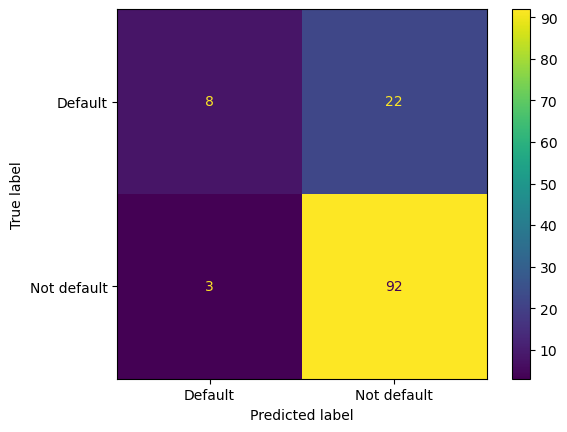

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Default", "Not default"])
disp.plot(values_format='d')

# Optimizing Parameters

In [51]:
params = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'gamma': [0.00, 0.10, 0.20, 0.30, 0.40],
    'reg_lambda': [0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
    'scale_pos_weight': [1, 2, 3, 4, 5],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7],
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7]
}


In [52]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [53]:
def timer(start_time = None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [54]:
classifier = xgb.XGBClassifier()

In [63]:
random_search = RandomizedSearchCV(classifier, 
                                   param_distributions=params, 
                                   n_iter = 100, 
                                   scoring = 'roc_auc', 
                                   n_jobs = -1, 
                                   cv = 10, 
                                   verbose = 3)

In [64]:
from datetime import datetime

start_time = timer(None)
random_search.fit(X_train, y_train)
timer(start_time)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits

 Time taken: 0 hours 0 minutes and 29.25 seconds.


In [65]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
random_search.best_params_

{'scale_pos_weight': 2,
 'reg_lambda': 6.0,
 'min_child_weight': 3,
 'max_depth': 13,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [74]:
best_params = random_search.best_params_

In [75]:
clf_xgb_best = xgb.XGBClassifier(
    objective = 'binary:logistic',
    seed = 42,
    **best_params
)

In [86]:
clf_xgb_best.set_params(eval_metric='aucpr', early_stopping_rounds=100)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=100,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [87]:
clf_xgb_best.fit(
    X_train, 
    y_train, 
    eval_set=[(X_test, y_test)], 
    #eval_metric='aucpr', 
    #early_stopping_rounds=20, 
    verbose=True
)

[0]	validation_0-aucpr:0.81680
[1]	validation_0-aucpr:0.90283
[2]	validation_0-aucpr:0.91819
[3]	validation_0-aucpr:0.92188
[4]	validation_0-aucpr:0.95072
[5]	validation_0-aucpr:0.95270
[6]	validation_0-aucpr:0.94338
[7]	validation_0-aucpr:0.92538
[8]	validation_0-aucpr:0.92826
[9]	validation_0-aucpr:0.92175
[10]	validation_0-aucpr:0.92974
[11]	validation_0-aucpr:0.92405
[12]	validation_0-aucpr:0.92851
[13]	validation_0-aucpr:0.93097
[14]	validation_0-aucpr:0.92882
[15]	validation_0-aucpr:0.93003
[16]	validation_0-aucpr:0.92979
[17]	validation_0-aucpr:0.92383
[18]	validation_0-aucpr:0.92003
[19]	validation_0-aucpr:0.92078
[20]	validation_0-aucpr:0.92285
[21]	validation_0-aucpr:0.92468
[22]	validation_0-aucpr:0.92140
[23]	validation_0-aucpr:0.92279
[24]	validation_0-aucpr:0.92692
[25]	validation_0-aucpr:0.92771
[26]	validation_0-aucpr:0.92316
[27]	validation_0-aucpr:0.92350
[28]	validation_0-aucpr:0.92401
[29]	validation_0-aucpr:0.92507
[30]	validation_0-aucpr:0.92391
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=100,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [88]:
clf_xgb_best.score(X_test, y_test)

0.808

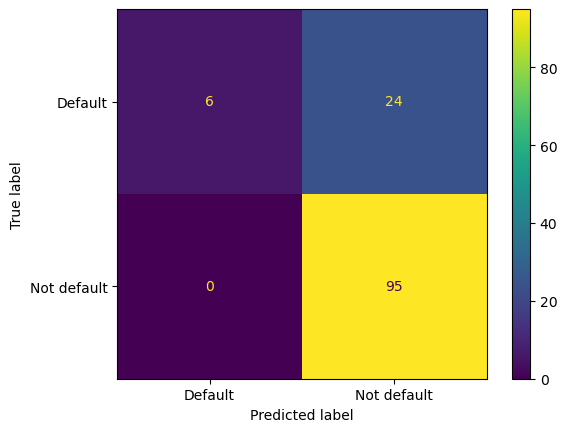

In [89]:
y_pred = clf_xgb_best.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Default", "Not default"])
disp.plot(values_format='d')

In [90]:
clf_xgb_tree = xgb.XGBClassifier(
    objective = 'binary:logistic',
    seed = 42,
    **best_params,
    n_estimators = 1)
clf_xgb_tree.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

weight:  {'age': 1.0, 'annual_income': 3.0, 'annual_expense': 3.0, 'temp_9': 1.0, 'temp_11': 1.0, 'rain_7': 2.0, 'rain_12': 1.0}
gain:  {'age': 0.60687255859375, 'annual_income': 18.058671951293945, 'annual_expense': 18.05927276611328, 'temp_9': 0.3115262985229492, 'temp_11': 0.8821220397949219, 'rain_7': 3.636964797973633, 'rain_12': 1.1740493774414062}
cover:  {'age': 52.19052505493164, 'annual_income': 35.60519790649414, 'annual_expense': 44.98833084106445, 'temp_9': 17.19396209716797, 'temp_11': 58.581199645996094, 'rain_7': 58.50511932373047, 'rain_12': 47.017120361328125}
total_gain:  {'age': 0.60687255859375, 'annual_income': 54.17601776123047, 'annual_expense': 54.177818298339844, 'temp_9': 0.3115262985229492, 'temp_11': 0.8821220397949219, 'rain_7': 7.273929595947266, 'rain_12': 1.1740493774414062}
total_cover:  {'age': 52.19052505493164, 'annual_income': 106.81559753417969, 'annual_expense': 134.96499633789062, 'temp_9': 17.19396209716797, 'temp_11': 58.581199645996094, 'rain

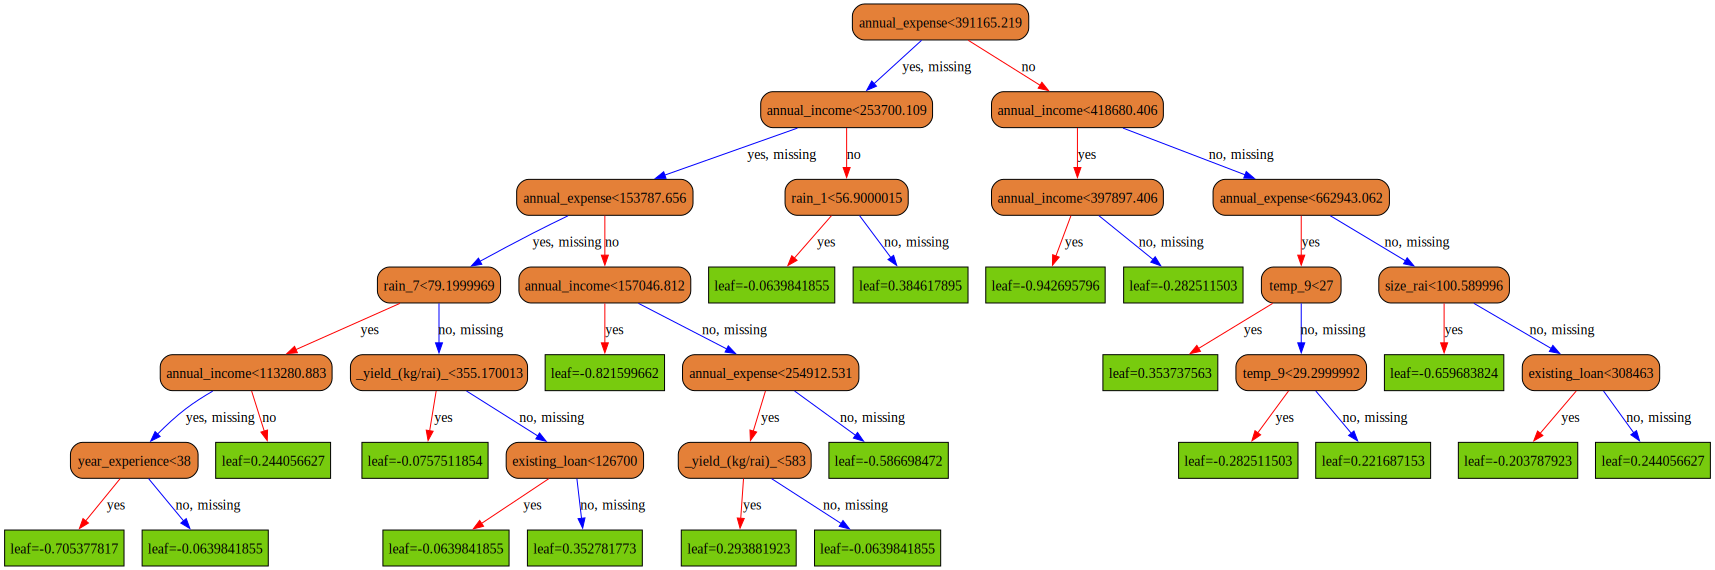

In [91]:
bst = clf_xgb_tree.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

node_params = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': '#e48038'}
leaf_params = {'shape': 'box',
               'style': 'filled',
               'fillcolor': '#78cbe'}

xgb.to_graphviz(clf_xgb, num_trees = 0, size ="10, 10",
                condition_node_params=node_params,
                leaf_node_params=leaf_params)

In [92]:
dot_data = xgb.to_graphviz(clf_xgb_tree, num_trees=0, size="10,10", 
                           condition_node_params=node_params,
                           leaf_node_params=leaf_params)

with open("xgboost_tree.dot", "w") as f:
    f.write(dot_data.source)

In [93]:
import pydotplus
from graphviz import Source

# Load the DOT file
with open("xgboost_tree.dot") as f:
    dot_graph = f.read()

# Use pydotplus to convert to a Graphviz object
graph = pydotplus.graph_from_dot_data(dot_graph)

# Save as a JPG file
graph.write_jpg("xgboost_tree.jpg")

True

In [94]:
y_pred_proba = clf_xgb_best.predict_proba(X_test)[:, 1]

In [95]:
y_pred_proba

array([0.90946984, 0.7255292 , 0.89032334, 0.46366948, 0.8701829 ,
       0.9258134 , 0.91971374, 0.9327496 , 0.36848798, 0.85848033,
       0.90859956, 0.8967618 , 0.8739283 , 0.91847646, 0.9400512 ,
       0.76374435, 0.89998585, 0.9400512 , 0.80969095, 0.91971374,
       0.776258  , 0.8874522 , 0.87647206, 0.91971374, 0.83673733,
       0.9327496 , 0.9258134 , 0.90645653, 0.9052263 , 0.9041882 ,
       0.89512545, 0.83752996, 0.5160218 , 0.8279097 , 0.9400512 ,
       0.86806923, 0.74298644, 0.8611544 , 0.91201735, 0.9240321 ,
       0.85848033, 0.9400512 , 0.93292016, 0.36848798, 0.91070366,
       0.8227238 , 0.73101556, 0.8242488 , 0.6924088 , 0.89686215,
       0.88236815, 0.9158671 , 0.82497436, 0.89512545, 0.86806923,
       0.8396518 , 0.9230868 , 0.91868   , 0.9400512 , 0.9400512 ,
       0.54398715, 0.8833273 , 0.9254562 , 0.8126273 , 0.8611544 ,
       0.89512545, 0.89967155, 0.87149614, 0.92151004, 0.8997685 ,
       0.9327496 , 0.92348105, 0.91971374, 0.9385891 , 0.86237